### Importing neccessary packages

In [1]:
!pip install pandas-profiling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_excel(r"C:\Users\Dell\Desktop\excel\Churn-Data for modal.xlsx",engine='openpyxl')

In [4]:
# from this we get all neccessary information report about data like what is datatype of variables, how many missing values are there and many more.
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# this will show all columns of dataframe
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# from this we get no of null values in clumns,and there datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Convert the 'TotalCharges' column to numeric, handling errors by coercing empty strings to NaN
# we drop customerID column becuase all values in this column are unique
df=df.drop('customerID', axis=1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
# this show that how many null values are there in each column
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# replace NaN values of TotalCharges with median value of TotalCharges
df.TotalCharges = df.TotalCharges.fillna(df.TotalCharges.median())
# df.isnull().sum()

In [11]:
#from this we get number of categories in each column
for i in df.columns:
    print(f'{i}')
    print(df[i].value_counts())
    print('*'*10)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
**********
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
**********
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
**********
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
**********
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
**********
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
**********
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
**********
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
**********
OnlineBackup
No                     3088
Yes    

In [12]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [13]:
# this show that- (1)tenure is right-skewed becuase mean is grater than median(50%)              
#                 (2)MonthlyCharges is left-skewed mean is less than median(50%)              
#                 (3)TotalCharges is right-skewed becuase mean is grater than median(50%)              
# SeniorCitizen is categarical data.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Separate numerical and categorical columns

In [14]:
numerical_feature = df.select_dtypes(include=['number']).columns
categorical_feature = df.select_dtypes(include=['object']).columns

In [15]:
print(numerical_feature)
len(numerical_feature)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


4

In [16]:
print(type(numerical_feature))

<class 'pandas.core.indexes.base.Index'>


In [17]:
print(categorical_feature)
len(categorical_feature)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


16

### univariate-analysis for continuous column

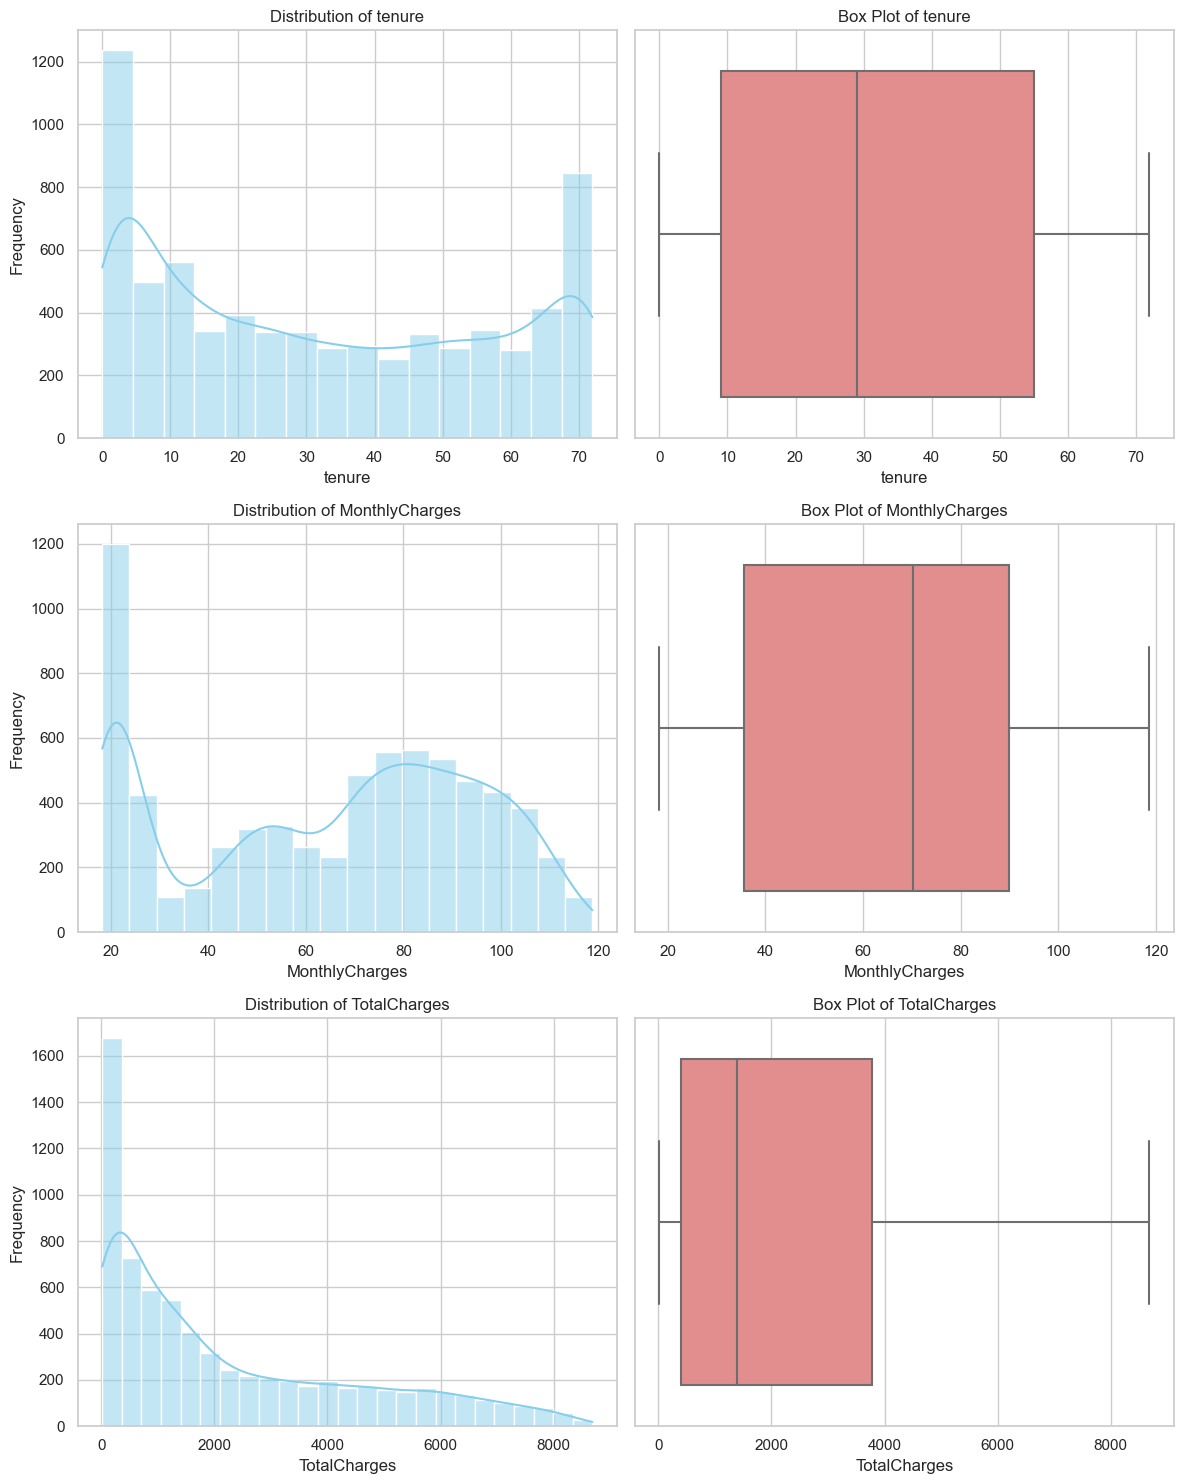

In [18]:
# Select numerical columns(SeniorCitizen column have 2 category only it is not continuous)
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# Plot dist plots
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, color='skyblue', ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

# Plot box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], color='lightcoral', ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {column}')
    axes[i, 1].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

### multivariate-analysis for continuous column

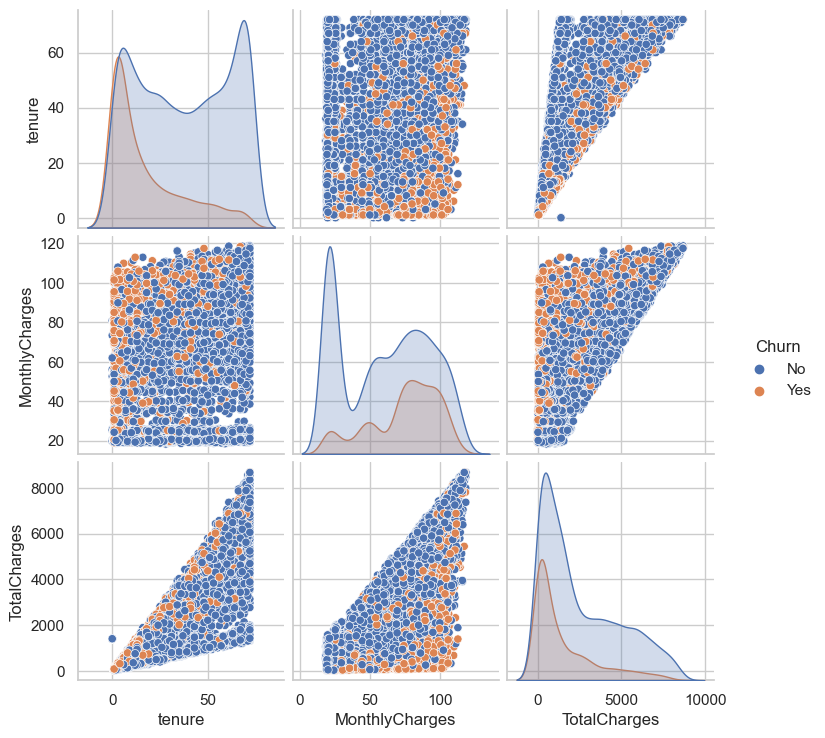

In [19]:
sns.pairplot(df.drop(columns='SeniorCitizen'),hue='Churn')

In [20]:
# we add 'SeniorCitizen' to categorical_feature( pandas Index object type)
categorical_columns = categorical_feature.append(pd.Index(['SeniorCitizen']))
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'],
      dtype='object')

### univariate & multivarient-analysis for  categorical_columns

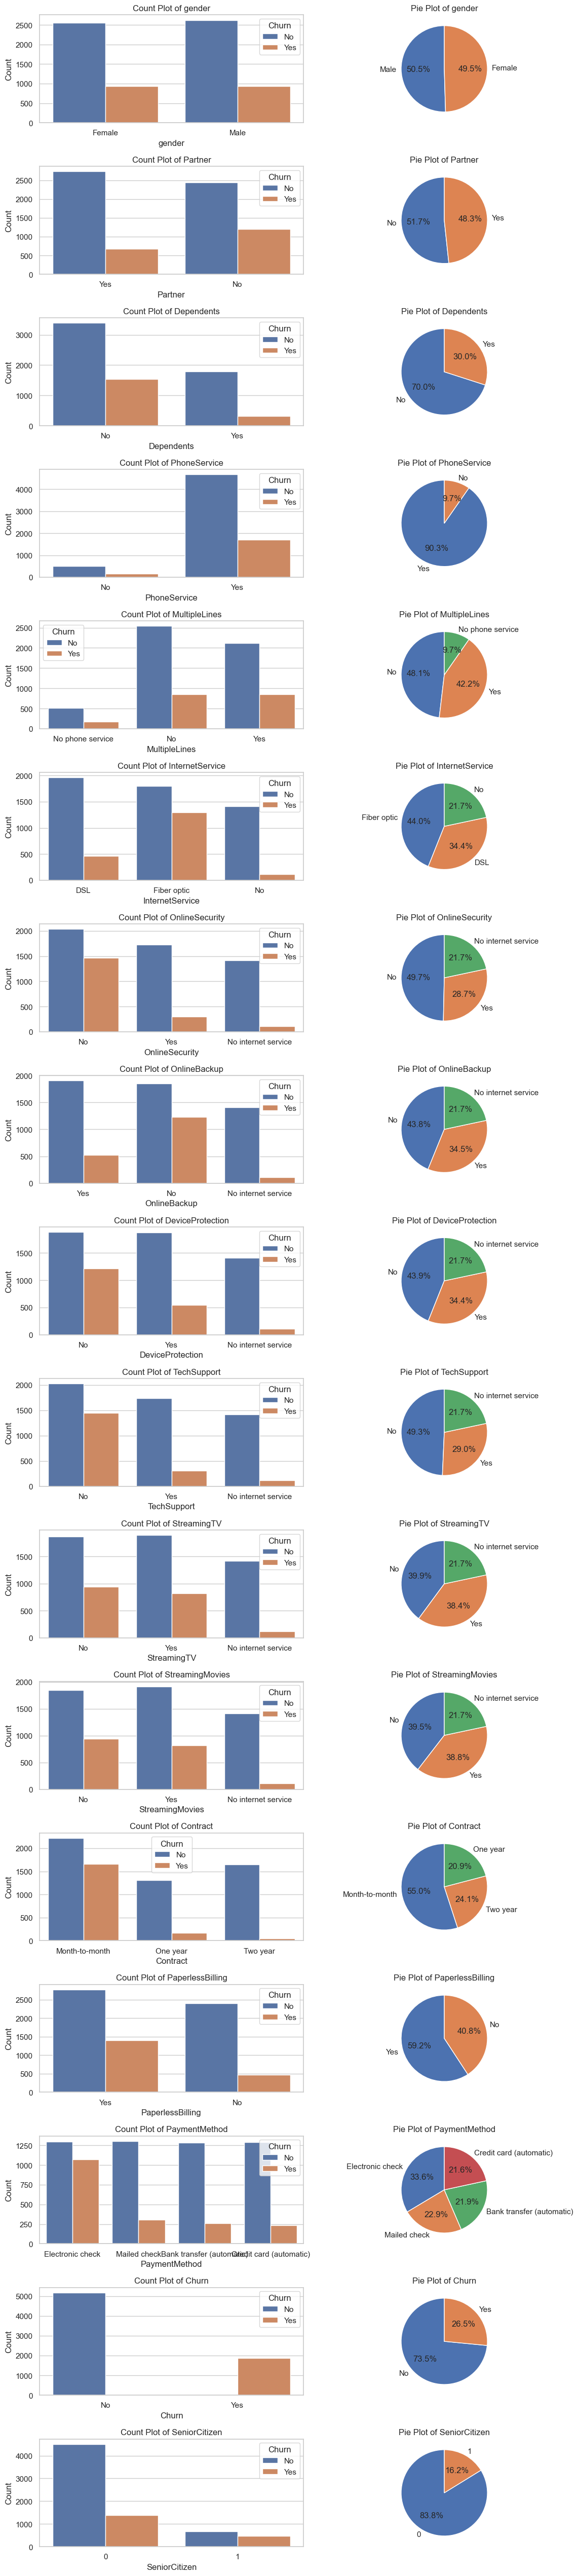

In [21]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=2, figsize=(12, 3*len(categorical_columns)))

# Plot count plots and pie plots
for i, column in enumerate(categorical_columns):
    # Count plot
    sns.countplot(x=column, data=df, ax=axes[i, 0],hue='Churn')
    axes[i, 0].set_title(f'Count Plot of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Count')

    # Pie plot
    value_counts = df[column].value_counts()
    axes[i, 1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Pie Plot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

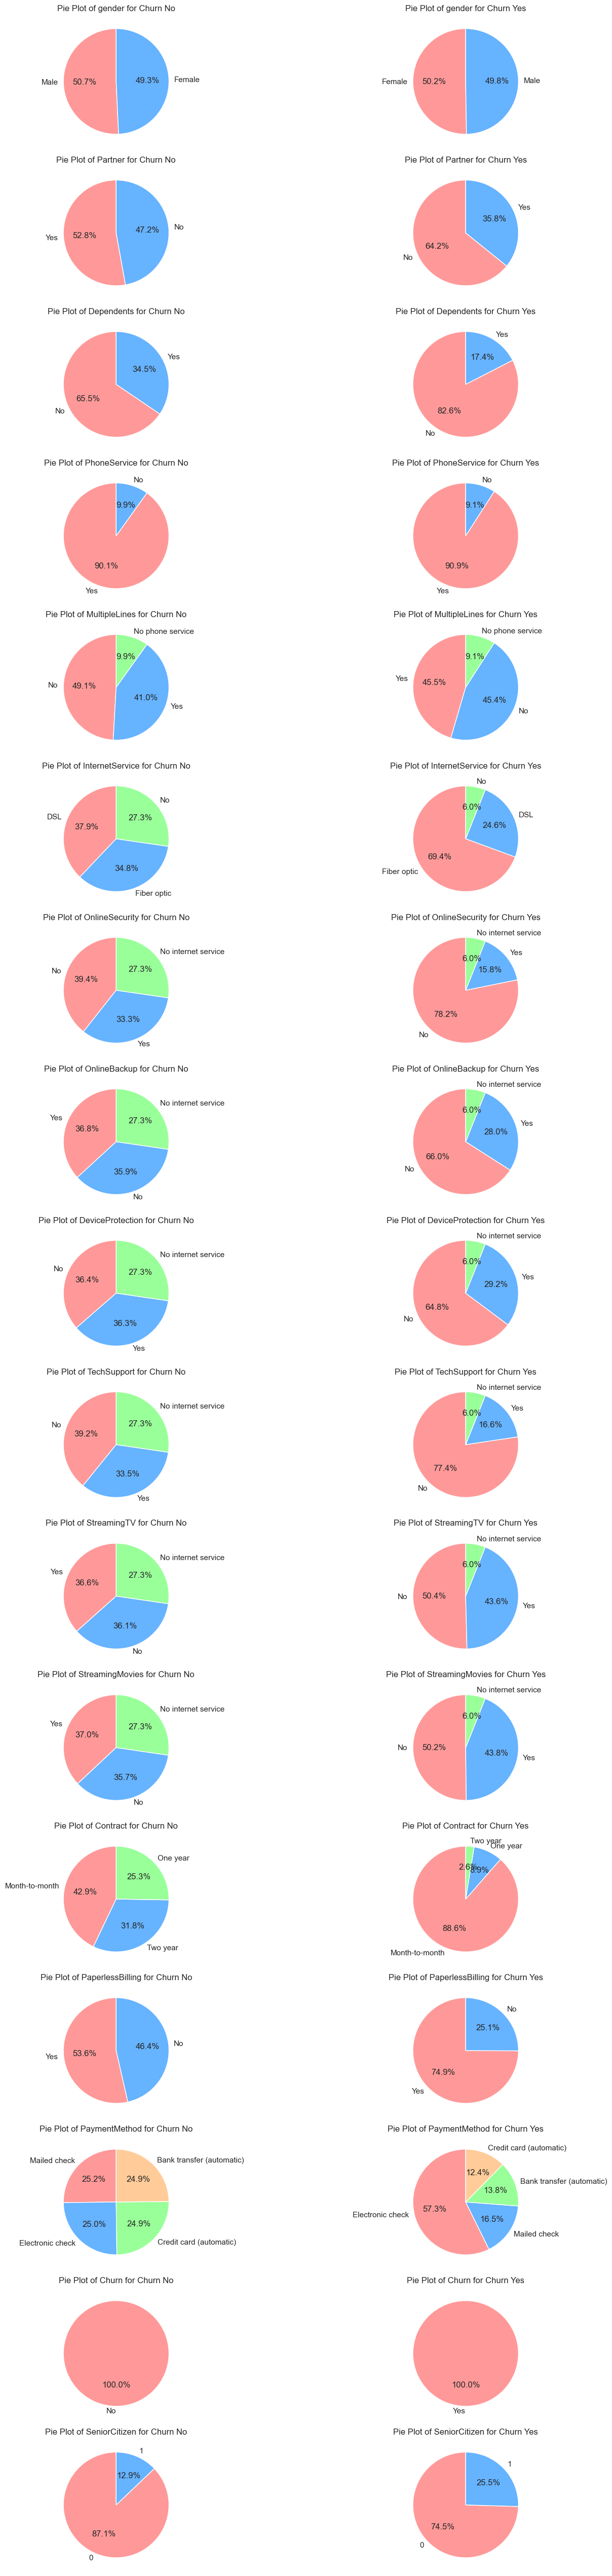

In [22]:
# Define a custom color palette with more colors
custom_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=len(df['Churn'].unique()), figsize=(15, 3*len(categorical_columns)))

# Plot separate pie plots for each category with 'Churn' as Hue
for i, column in enumerate(categorical_columns):
    for j, churn_status in enumerate(df['Churn'].unique()):
        subset_df = df[df['Churn'] == churn_status]
        churn_counts = subset_df[column].value_counts()

        axes[i, j].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_palette)
        axes[i, j].set_title(f'Pie Plot of {column} for Churn {churn_status}')

# Adjust layout
plt.tight_layout()
plt.show()

### spliting dataframe in X_train,X_test,y_train,y_test

In [154]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Churn']),df['Churn'],test_size=0.2,random_state=2)

In [155]:
train_ratio = y_train.value_counts(normalize=True)
train_ratio

0    0.730032
1    0.269968
Name: Churn, dtype: float64

In [156]:
test_ratio = y_test.value_counts(normalize=True)
test_ratio

0    0.753016
1    0.246984
Name: Churn, dtype: float64

### here percentage of categories in target column y is not equivalent to do this we use StratifiedShuffleSplit

In [157]:
X=df.drop(columns=['Churn'])
y=df['Churn']
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [158]:
train_ratio = y_train.value_counts(normalize=True)
train_ratio

0    0.734647
1    0.265353
Name: Churn, dtype: float64

In [159]:
test_ratio = y_test.value_counts(normalize=True)
test_ratio

0    0.734564
1    0.265436
Name: Churn, dtype: float64

In [160]:
X_train.shape

(5634, 19)

In [161]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [162]:
X_test.shape

(1409, 19)

In [163]:
y_train.shape

(5634,)

In [164]:
y_test.shape

(1409,)

### now we do feature encoding to do this we use OneHotEncoder because all variable have nominal data.becuase we using OneHotEncodin there can be multicolinearity to prevent from this we remove first column of all encoded column

In [165]:
categorical_feature = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
transformer = ColumnTransformer(transformers=[
                 ('tnf1',OneHotEncoder(sparse=False,drop='first'),categorical_feature)],remainder='passthrough')
                 
                                

In [166]:
X_train= transformer.fit_transform(X_train)

In [167]:
X_train.shape

(5634, 30)

In [168]:
X_test=transformer.transform(X_test)

In [169]:
X_test.shape

(1409, 30)

### here we do feature encoding with target(Churn) column to do this we use LabelEncoder

In [170]:
le = LabelEncoder()

In [171]:
le.fit(y_train)

LabelEncoder()

In [172]:
le.classes_

array([0, 1])

In [173]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [174]:
y_train.shape

(5634,)

In [175]:
y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [176]:
y_test.shape

(1409,)

In [177]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### there many columns created after encoding we use only 10 best columns using SelectKBest

In [178]:
from sklearn.feature_selection import SelectKBest
selection = SelectKBest()  # k=10 default
X_train = selection.fit_transform(X_train,y_train)

In [179]:
selection.get_support()

array([False, False, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False])

In [180]:
X_train.shape

(5634, 10)

In [181]:
X_test=selection.transform(X_test)

In [182]:
X_test.shape

(1409, 10)

In [183]:
y_train.shape

(5634,)

In [184]:
y_test.shape

(1409,)

### here we starts different-different classification modal training

In [185]:
# LogisticRegression()
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.7899219304471257
Confusion matrix :
 [[935 196]
 [100 178]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1131
           1       0.48      0.64      0.55       278

    accuracy                           0.79      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.82      0.79      0.80      1409



In [186]:
# GradientBoostingClassifier()
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.1,
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=9,
                           min_samples_split=7, n_estimators=150)
gbc_tunning.fit(X_train, y_train)
pred = gbc_tunning.predict(X_test)

print(f'Accuracy score : {accuracy_score(pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test)}')
print(f'Classification report :\n {classification_report(pred, y_test)}')

Accuracy score : 0.7828246983676366
Confusion matrix :
 [[923 194]
 [112 180]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1117
           1       0.48      0.62      0.54       292

    accuracy                           0.78      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.81      0.78      0.79      1409



In [16]:

# Define the parameter grid to search
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(loc=0, scale=4),  # Continuous distribution for C
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    log_reg, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model for predictions
best_model = random_search.best_estimator_
pred = best_model.predict(X_test)

print(f'Accuracy score : {accuracy_score(pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test)}')
print(f'Classification report :\n {classification_report(pred, y_test)}')

Best Hyperparameters: {'C': 1.0885289975385413, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy score : 0.8062455642299503
Confusion matrix :
 [[927 165]
 [108 209]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      1092
           1       0.56      0.66      0.60       317

    accuracy                           0.81      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.82      0.81      0.81      1409



In [126]:


# Define the parameter grid to search
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier model
rf_classifier = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1
)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search_rf.best_params_)

# Use the best model for predictions
best_rf_model = random_search_rf.best_estimator_
pred_rf = best_rf_model.predict(X_test)

print(f'Accuracy score : {accuracy_score(pred_rf, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(pred_rf, y_test)}')
print(f'Classification report :\n {classification_report(pred_rf, y_test)}')

Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 19, 'min_samples_split': 16, 'n_estimators': 153}
Accuracy score : 0.7927608232789212
Confusion matrix :
 [[934 191]
 [101 183]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1125
           1       0.49      0.64      0.56       284

    accuracy                           0.79      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.82      0.79      0.80      1409



In [127]:

# Define the parameter grid to search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1
)

# Fit the model
random_search_dt.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search_dt.best_params_)

# Use the best model for predictions
best_dt_model = random_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

print(f'Accuracy score : {accuracy_score(y_pred_dt, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(y_pred_dt, y_test)}')
print(f'Classification report :\n {classification_report(y_pred_dt, y_test)}')

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 11, 'min_samples_split': 18, 'splitter': 'random'}
Accuracy score : 0.7920511000709723
Confusion matrix :
 [[929 187]
 [106 187]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1116
           1       0.50      0.64      0.56       293

    accuracy                           0.79      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.81      0.79      0.80      1409



In [128]:

# Define the parameter grid to search
param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Initialize KNeighborsClassifier model
knn_classifier = KNeighborsClassifier()

# Initialize RandomizedSearchCV
random_search_knn = RandomizedSearchCV(
    knn_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1
)

# Fit the model
random_search_knn.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search_knn.best_params_)

# Use the best model for predictions
best_knn_model = random_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

print(f'Accuracy score : {accuracy_score(y_pred_knn, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(y_pred_knn, y_test)}')
print(f'Classification report :\n {classification_report(y_pred_knn, y_test)}')

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}
Accuracy score : 0.7714691270404542
Confusion matrix :
 [[946 233]
 [ 89 141]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      1179
           1       0.38      0.61      0.47       230

    accuracy                           0.77      1409
   macro avg       0.65      0.71      0.66      1409
weighted avg       0.83      0.77      0.79      1409



In [129]:

# Define the parameter grid to search
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.6, 0.4),  # Fraction of samples used for fitting the trees
}

# Initialize GradientBoostingClassifier model
gb_classifier = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(
    gb_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1
)

# Fit the model
random_search_gb.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search_gb.best_params_)

# Use the best model for predictions
best_gb_model = random_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

print(f'Accuracy score : {accuracy_score(y_pred_gb, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(y_pred_gb, y_test)}')
print(f'Classification report :\n {classification_report(y_pred_gb, y_test)}')

Best Hyperparameters: {'learning_rate': 0.01469092202235818, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 185, 'subsample': 0.602208846849441}
Accuracy score : 0.7877927608232789
Confusion matrix :
 [[948 212]
 [ 87 162]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.82      0.86      1160
           1       0.43      0.65      0.52       249

    accuracy                           0.79      1409
   macro avg       0.67      0.73      0.69      1409
weighted avg       0.83      0.79      0.80      1409



In [28]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_score, recall_score, f1_score

# Assuming you have your features (X) and labels (y) ready
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluate training scores
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate testing scores
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the scores
print("Training Scores:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")

print("\nTesting Scores:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")


Training Scores:
Accuracy: 0.81
Precision: 0.66
Recall: 0.55
F1 Score: 0.60

Testing Scores:
Accuracy: 0.80
Precision: 0.65
Recall: 0.56
F1 Score: 0.60


In [24]:
# Create and train a logistic regression model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluate training scores
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate testing scores
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the scores
print("Training Scores:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")

print("\nTesting Scores:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")

Training Scores:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Testing Scores:
Accuracy: 0.79
Precision: 0.64
Recall: 0.50
F1 Score: 0.56


In [23]:
# Create and train a logistic regression model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluate training scores
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate testing scores
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the scores
print("Training Scores:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")

print("\nTesting Scores:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")

Training Scores:
Accuracy: 1.00
Precision: 1.00
Recall: 0.99
F1 Score: 1.00

Testing Scores:
Accuracy: 0.74
Precision: 0.50
Recall: 0.49
F1 Score: 0.50


In [25]:
# Create and train a logistic regression model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluate training scores
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate testing scores
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the scores
print("Training Scores:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")

print("\nTesting Scores:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")

Training Scores:
Accuracy: 0.83
Precision: 0.73
Recall: 0.57
F1 Score: 0.64

Testing Scores:
Accuracy: 0.77
Precision: 0.58
Recall: 0.43
F1 Score: 0.49


In [26]:
# Create and train a logistic regression model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluate training scores
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate testing scores
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the scores
print("Training Scores:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")

print("\nTesting Scores:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")

Training Scores:
Accuracy: 0.83
Precision: 0.72
Recall: 0.56
F1 Score: 0.63

Testing Scores:
Accuracy: 0.80
Precision: 0.65
Recall: 0.51
F1 Score: 0.57


In [32]:
from sklearn.model_selection import cross_val_score


# Create a logistic regression model
model = LogisticRegression()

# Perform 5-fold cross-validation
# You can adjust the number of folds using the cv parameter
# Scoring can be set to different metrics based on your requirements
# Common metrics include 'accuracy', 'precision', 'recall', 'f1', etc.
cross_val_results = cross_val_score(model, X_train, y_train, cv=30, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Results:")
for i, score in enumerate(cross_val_results, 1):
    print(f"Fold {i}: {score:.4f}")

# Print the average cross-validation score
average_cv_score = cross_val_results.mean()
print(f"\nAverage Cross-Validation Score: {average_cv_score:.4f}")


Cross-Validation Results:
Fold 1: 0.8404
Fold 2: 0.8457
Fold 3: 0.8245
Fold 4: 0.7926
Fold 5: 0.8404
Fold 6: 0.8245
Fold 7: 0.8138
Fold 8: 0.7926
Fold 9: 0.8245
Fold 10: 0.7926
Fold 11: 0.8138
Fold 12: 0.7926
Fold 13: 0.8298
Fold 14: 0.8138
Fold 15: 0.7926
Fold 16: 0.7766
Fold 17: 0.8457
Fold 18: 0.7660
Fold 19: 0.8138
Fold 20: 0.7553
Fold 21: 0.7766
Fold 22: 0.7926
Fold 23: 0.8085
Fold 24: 0.7713
Fold 25: 0.8396
Fold 26: 0.7807
Fold 27: 0.7754
Fold 28: 0.8289
Fold 29: 0.7594
Fold 30: 0.7807

Average Cross-Validation Score: 0.8035


### after doing random search cv hyper parameter tuning we get best accuracy score, precision and recal for logistic regression.from pandas profiling - we get that MonthlyCharges column is highly correlated with Churn column so we can reduce churn by reducing MonthlyCharges.